In [1]:
# go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
!python filter_cube.py --infile data/outcube_median_022.fits.gz --outfile data/sf2outcube_median_022.fits.gz
!python filter_cube.py --infile data/outcube_median_033.fits.gz --outfile data/sf2outcube_median_033.fits.gz
!python filter_cube.py --infile data/outcube_median_034.fits.gz --outfile data/sf2outcube_median_034.fits.gz
!python filter_cube.py --infile data/outcube_median_036.fits.gz --outfile data/sf2outcube_median_036.fits.gz
!python filter_cube.py --infile data/outcube_median_037.fits.gz --outfile data/sf2outcube_median_037.fits.gz
!python filter_cube.py --infile data/outcube_median_042.fits.gz --outfile data/sf2outcube_median_042.fits.gz
!python filter_cube.py --infile data/outcube_median_043.fits.gz --outfile data/sf2outcube_median_043.fits.gz
!python filter_cube.py --infile data/outcube_median_044.fits.gz --outfile data/sf2outcube_median_044.fits.gz
!python filter_cube.py --infile data/outcube_median_045.fits.gz --outfile data/sf2outcube_median_045.fits.gz
!python filter_cube.py --infile data/outcube_median_046.fits.gz --outfile data/sf2outcube_median_046.fits.gz
!python filter_cube.py --infile data/outcube_median_073.fits.gz --outfile data/sf2outcube_median_073.fits.gz
!python filter_cube.py --infile data/outcube_median_074.fits.gz --outfile data/sf2outcube_median_074.fits.gz
!python filter_cube.py --infile data/outcube_median_076.fits.gz --outfile data/sf2outcube_median_076.fits.gz
!python filter_cube.py --infile data/outcube_median_084.fits.gz --outfile data/sf2outcube_median_084.fits.gz
!python filter_cube.py --infile data/outcube_median_086.fits.gz --outfile data/sf2outcube_median_086.fits.gz
!python filter_cube.py --infile data/outcube_median_094.fits.gz --outfile data/sf2outcube_median_094.fits.gz
!python filter_cube.py --infile data/outcube_median_096.fits.gz --outfile data/sf2outcube_median_096.fits.gz
!python filter_cube.py --infile data/outcube_median_103.fits.gz --outfile data/sf2outcube_median_103.fits.gz
!python filter_cube.py --infile data/outcube_median_104.fits.gz --outfile data/sf2outcube_median_104.fits.gz
!python filter_cube.py --infile data/outcube_median_105.fits.gz --outfile data/sf2outcube_median_105.fits.gz

In [ ]:
!python cloud_finder2.py -i data/sf2outcube_median_022.fits.gz -b data/outcube_median_022.badregs  -o map_022.fits.gz

In [48]:
!python build_catalog.py -i data/sf2outcube_median_022.fits.gz -m map_022.fits.gz -o 022.txt

In [59]:
# soem first attampt at fitering detections
from astropy.io import ascii

IFU = 33
IFU = 34; badwlregions = [(467,492)]
IFU = 45
IFU = 46
IFU = 76
IFU = 84 ; badwlregions = [(664,688)]
IFU = 94
IFU = 96; badwlregions = [(103, 129)]
IFU = 22

t = ascii.read("{:03d}.txt".format(IFU), format="fixed_width")

ii  = t["flux"] > 100. 
ii  = t["flux"] < 1e5 
ii *= t["dwl"] < 30.
ii *= t["N"] > 400.
#ii *= t["diam"] > 8.

t

id,N,flux,ra_com,dec_com,ddec,dra,x_com,y_com,z_com,dx,dy,dz,diam,x_ext,y_ext,z_ext,wl_com,dwl,xmin,xmax,ymin,ymax,zmin,zmax
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64
1,956,441.21,150.186441,2.142048,1.6,1.3,91.37,48.31,176.13,3.15,2.65,2.3,4.11,14,12,10,3842.52,19.86,84,98,41,53,171,181
2,518,202.03,150.187787,2.151269,1.7,1.5,81.68,114.69,341.95,3.31,3.05,2.45,4.5,13,13,11,4171.82,21.84,76,89,109,122,338,349
3,364,175.38,150.1956,2.146011,0.9,1.2,25.47,76.84,556.94,1.74,2.31,1.66,2.89,8,11,8,4598.74,15.89,22,30,71,82,553,561
4,555,306.0,150.192587,2.153924,1.2,1.2,47.15,133.81,649.85,2.3,2.34,2.01,3.29,13,11,10,4783.26,19.86,42,55,128,139,644,654
5,152,61.348,150.185629,2.146493,0.8,0.8,97.21,80.31,728.37,1.6,1.52,1.31,2.21,6,7,5,4939.19,9.93,95,101,77,84,726,731
6,791,297.93,150.189814,2.155071,0.9,0.9,67.1,142.07,869.2,1.73,1.81,13.28,2.51,10,9,47,5218.84,93.33,61,71,138,147,844,891


# visialize detections in ds9

In [ ]:
!killall ds9

import os
cmd = "ds9 map_{:03d}.fits.gz mapfilter_{:03d}.fits.gz data/s2outcube_median_{:03d}.fits.gz data/outcube_median_{:03d}.fits.gz&".format(IFU,IFU,IFU,IFU)
os.system(cmd)

vmax = 0.6
!xpaset -p ds9 frame lock wcs
!xpaset -p ds9 cube lock wcs
!xpaset -p ds9 frame 1
!xpaset -p ds9 scale limits 0 30
!xpaset -p ds9 cmap hsv
!xpaset -p ds9 frame 2
!xpaset -p ds9 scale limits 0 $vmax
!xpaset -p ds9 cmap staircase
!xpaset -p ds9 frame 3
!xpaset -p ds9 scale limits 0 $vmax
!xpaset -p ds9 cmap staircase
!xpaset -p ds9 frame 4
!xpaset -p ds9 scale limits 0 5
!xpaset -p ds9 cmap staircase

for r in t[ii]:
    wl = r["wl_com"]
    x = r["x_com"]
    y = r["y_com"]
    s = np.sqrt( r["dx"]**2. + r["dy"]**2.)
    
    !xpaset -p ds9 frame 1
    !xpaset -p ds9 cube $wl wcs
    !xpaset -p ds9 zoom to 2
    !xpaset -p ds9 pan to $x $y image
    !xpaset -p ds9 frame 3
    !echo "image; circle $x $y $s # color="white"" | xpaset ds9 regions
    for c in r.columns.values():
        print("{:8s} : {}".format(c.name, r[c.name], c.unit ))
    input('Hit return for next object')

In [17]:
from astropy.io import fits

hdu = fits.open("map_022.fits.gz")
c = hdu['FILTERED_DATA'].data

In [16]:
hdu['FILTERED_DATA']

# build subcube MEF

In [ ]:
import numpy as np
if True:
    from astropy.io import fits
    # save map
    f = np.zeros_like(c)
    f[outmap > 0] = c[outmap > 0]


    h = fits.PrimaryHDU(data=outmap, header=s.hdu.header)
    h.header["CD1_1"] = -0.00013888888888888   
    h.header["CD1_2"] = 0. 
    h.header["CD2_2"] = 0.000138888888888888  
    h.header["CD2_1"] = 0.
    h.header["CD3_3"] = 1.985839800000122  

    hdu = fits.HDUList(h)

    
    pad = 15
    
    minx, maxx = 0,c.shape[2]
    miny, maxy = 0,c.shape[1]
    minz, maxz = 0,c.shape[0]
    for r in t[ii]:
        z1,z2 = max(r["zmin"]-pad,minz),min(r["zmax"]+pad,maxz)
        y1,y2 = max(r["ymin"]-pad,miny),min(r["ymax"]+pad,maxy)
        x1,x2 = max(r["xmin"]-pad,minx),min(r["xmax"]+pad,maxx)
                    
        subcube = c[ z1:z2 , y1:y2, x1:x2 ]
        h = fits.ImageHDU(subcube)
        h.header["name"] = r["id"]
        h.header["CD1_1"] = -0.00013888888888888   
        h.header["CD1_2"] = 0. 
        h.header["CD2_2"] = 0.000138888888888888  
        h.header["CD2_1"] = 0.
        h.header["CD3_3"] = 1.985839800000122  
        h.header["CRVAL3"] = s.grid()[z1]
        h.header["CRPIX3"] = 1.
        hdu.append(h)

    hdu.writeto("catalog.fits", overwrite=True)

# 3D slice plot

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

import spectrum

from astropy.io import ascii

In [78]:
# soem first attampt at fitering detections
from astropy.io import ascii

IFU = 22

t = ascii.read("{:03d}.txt".format(IFU), format="fixed_width")

ii  = t["flux"] > 100. 
ii  = t["flux"] < 1e5 
ii *= t["dwl"] < 30.
ii *= t["N"] > 400.
#ii *= t["diam"] > 8.


In [79]:
# register color map
from matplotlib.cm import register_cmap, cmap_d

colors = []
for ii in range(1,6):
    kk = ii/5.
    colors.append( (kk*.3,kk*.3,kk*1)  )

for ii in range(1,6):
    kk = ii/5.
    colors.append( (kk*.3,kk*1,kk*.3)  )
for ii in range(1,6):
    kk = ii/5.
    colors.append( (kk*1,kk*.3,kk*.3)  )
colors = np.array(colors)
xx = np.arange(len(colors), dtype=float)
xx = xx/xx.max()
    
ds9staircase = {'red': lambda v : np.interp(v, xx, colors[:,0]),
           'green': lambda v : np.interp(v, xx, colors[:,1]),
           'blue': lambda v : np.interp(v, xx, colors[:,2])}


# Register all other colormaps
register_cmap('ds9staircase', data=ds9staircase)

In [80]:

def plot_3D_array_slices(ax, array, dz=[-1,0,1], alpha=[0.1,1.,0.1], wlstart=0, wlstep=1, min_val=0.,max_val=0.6, xstart=0, xstep=0.5, ystart=0, ystep=0.5):
    n_x, n_y, n_z = array.shape
    colormap = plt.get_cmap('ds9staircase')

    
    islice = np.argmax(alpha)
    for z,a in zip(dz,alpha):
        x_cut = array[n_x//2+z,:,:]
        Y, Z = np.mgrid[0:n_y, 0:n_z]
        Y = Y  * ystep + ystart
        Z = Z  * xstep + xstart
        X = (n_x//2 * np.ones((n_y, n_z)) + z) * wlstep + wlstart

        ax.plot_surface(Y, X, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False, alpha=a)
    ax.set_title("$\lambda$ = {:.1f} A".format((n_x//2 + dz[islice])* wlstep + wlstart))

    ax.set_ylabel("wavelength [A]")
    ax.set_xlabel("y [arcsec]")
    ax.set_zlabel("x [arcsec]")
    ax.xaxis.labelpad=15
    ax.yaxis.labelpad=15
    ax.zaxis.labelpad=15


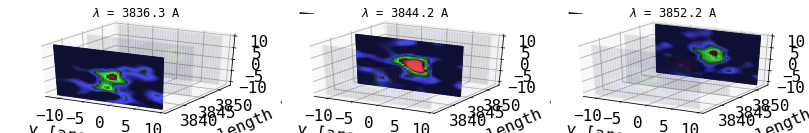

In [72]:
from astropy.io import fits


def do_slices(r, s, axx, dz = [-4,0,4]):
    
    dz = np.array(dz) + 0
    if not len(dz) == len(axx):
        print("Error, da and axx must be the same length.")
        return
    
    c = s.data
    pad = 15

    minx, maxx = 0,c.shape[2]
    miny, maxy = 0,c.shape[1]
    minz, maxz = 0,c.shape[0]

      
    z1,z2 = max(r["zmin"]-pad,minz),min(r["zmax"]+pad,maxz)
    y1,y2 = max(r["ymin"]-pad,miny),min(r["ymax"]+pad,maxy)
    x1,x2 = max(r["xmin"]-pad,minx),min(r["xmax"]+pad,maxx)

    subcube = c[ z1:z2 , y1:y2, x1:x2 ]

    wlstart, wlstep = s.grid()[z1], s.step


    platescale = s.hdu.header['CDELT2']*3600.

    ystart = (y1 - r["y_com"])*platescale
    ystep = platescale
    xstart = (x1 - r["x_com"])*platescale
    xstep = platescale

    figs = []
    for i,ax in enumerate(axx):
        
        #fig = plt.figure(figsize=[9,7])
        #ax = fig.add_subplot(111, projection='3d')
        alpha = [0.03] * len(dz)
        alpha[i] = 1.
        plot_3D_array_slices(ax, subcube, dz=dz, alpha=alpha, wlstart=wlstart, wlstep=wlstep, xstart = xstart, xstep = xstep , ystart = ystart, ystep = ystep )
        figs.append(fig)
    return figs



foutmap = "map_022.fits.gz"
fincube = "data/sf2outcube_median_022.fits.gz"
fcatalog = "022.txt"

outmap = fits.getdata(foutmap)
s = spectrum.readSpectrum(fincube)
t = ascii.read(fcatalog, format="fixed_width")

# object selection
r = t[0]     

#figs = do_slices(r, s)


import numpy
from matplotlib import pyplot as plot

grid_size = (4, 4)
 
# Plot 1
fig = plt.figure(figsize=[15,7])
ax1 = plot.subplot2grid(grid_size, (0, 0), rowspan=1, colspan=1, projection='3d')
ax2 = plot.subplot2grid(grid_size, (0, 1), rowspan=1, colspan=1, projection='3d')
ax3 = plot.subplot2grid(grid_size, (0, 2), rowspan=1, colspan=1, projection='3d')

do_slices(r, s, [ax1, ax2, ax3])
 
# Automagically fits things together
plot.tight_layout()
 
# Done !
plot.show()

In [46]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for fig in figs: ## will open an empty extra figure :(
    pdf.savefig( fig)
pdf.close()

In [47]:
!open .

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")


# spectral extraction

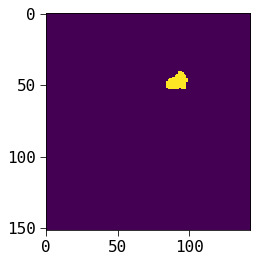

In [60]:
# object selection
r = t[0]     


from astropy.stats import biweight_location

mask = np.sum( outmap == r['id'], axis=0) > 0

import numpy as np
sout = np.zeros( s.data.shape[0]  )
for i in range(s.data.shape[0]):
    sout[i] = biweight_location( s.data[i][mask] )
    
ww = s.grid()

plt.imshow(mask)

In [12]:
from scipy import interpolate

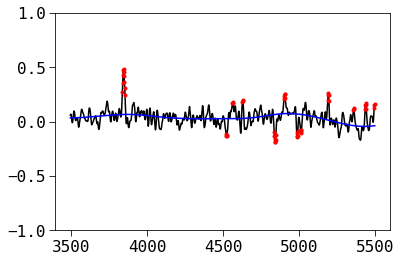

In [13]:
# simple continuum removal though spline interpolation
def confitSpl(wls, s, n = 10, kappaL=2.5, kappaU=2.5, output_fit=False, smooth=0., mask=None, PLOT=False, maxiter=15):
    

        
    if mask == None:
        mask = wls > -1 # use all
    l = len(wls)
    l = np.floor(l/n)
    dwl = (wls[-1]-wls[0])/n

    niter = 0
    nmasked = len(mask[~mask])
    while niter < maxiter:
        bwls = []
        bs   = []

        # put one point at the blue end, window only half the normal binsize
        wlstart = wls[0]
        wlstop  = wls[0] + dwl/2.
        ii = (wls >= wlstart) * (wls <= wlstop)         
        if type(mask) != type(None): ii *= mask
        binned_wls = np.mean( wls[ii] )
        bwls.append( binned_wls )
        bs.append(    np.median(   s[ii] ) )
        # normal points, normal binsize
        for i in range(n-1):
                wlstart = wls[0]  + dwl/2. + dwl * i
                wlstop  = wls[0]  + dwl/2. + dwl * (i + 1) 
                ii = (wls >= wlstart) * (wls <= wlstop)         
                if type(mask) != type(None): ii *= mask
                binned_wls = np.mean( wls[ii] )
                bwls.append( binned_wls )
                bs.append(    np.median(   s[ii] ) )
        # put one point at the red end, window only half the normal binsize
        wlstart = wls[-1] - dwl/2.
        wlstop  = wls[-1]
        ii = (wls >= wlstart) * (wls <= wlstop)         
        if type(mask) != type(None): ii *= mask
        binned_wls = np.mean( wls[ii] )
        bwls.append( binned_wls )
        bs.append(    np.median(   s[ii] ) )

        tck = interpolate.splrep(bwls,bs,s=smooth)
        c = interpolate.splev(wls,tck,der=0)

        res = s-c
        sigma = np.std(res[mask])
        

        inliers  = ( res) <= kappaU*sigma
        inliers *= (-res) <= kappaL*sigma



        mask *= inliers
        nmasked_new = len(mask[~mask])
        if nmasked_new == nmasked:
            break
        nmasked = nmasked_new

        niter += 1
    f=plt.figure()
    plt.plot(wls,s) 
    plt.plot(wls,c)
    plt.plot(wls[~mask],s[~mask],'r.') 
    plt.ylim([-1.,1.])
        
    # filter lowest and highest 3 fourier channels
    sc = s-c

    if output_fit:
        return sc,c
    else:
        return sc


csout = confitSpl(ww, sout, PLOT=True)

# line detection

/Users/mxhf/.pyenv/versions/anaconda3-4.3.1/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


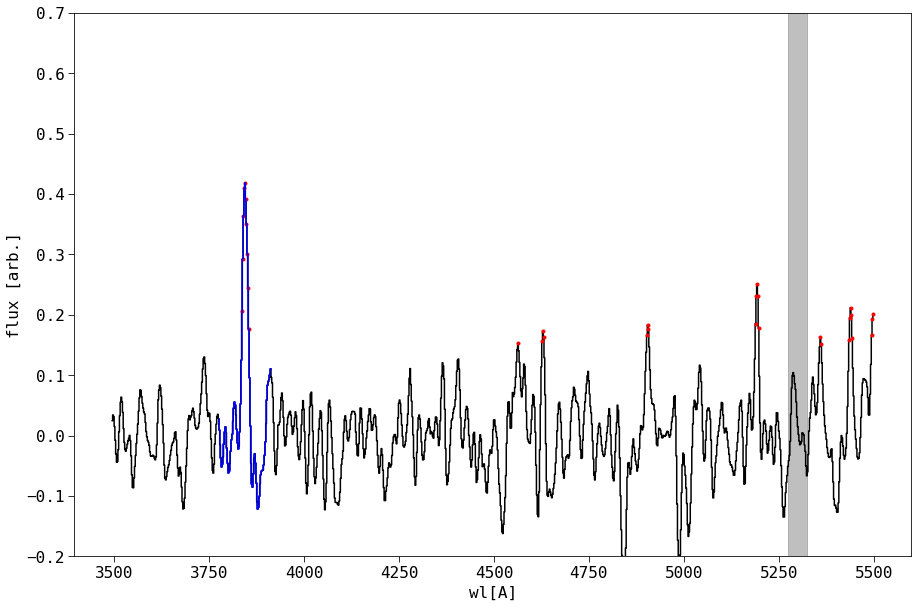

In [76]:
def plot_spec(ax1, ax2, ww, csout, bad = [[5275.,5325.]], threshold = 0.15):
    jj = csout > threshold

    #f = plt.figure(figsize = [15,10])
    ax1 = plt.axes()
    plt.plot(ww, csout, drawstyle='steps-mid')

    plt.ylim([-30,100])
    plt.xlabel("wl[A]")
    plt.ylabel("flux [arb.]")

    ii_bad = ww < 0.
    for b in bad:
        plt.axvspan(b[0], b[1], alpha=0.5, color='grey')
        ii_bad += (ww > b[0]) * (ww < b[1])

    plt.plot(ww[~ii_bad * jj], csout[~ii_bad * jj], 'r.')
    #plt.plot(ww[~ii_bad], csout[~ii_bad], drawstyle='steps-mid')


    pad = 30
    minz, maxz = 0,s.data.shape[0]
    z1,z2 = max(r["zmin"]-pad,minz),min(r["zmax"]+pad,maxz)

    #ax2 = plt.axes([.4,.55,.3,.3])
    plt.plot(ww[z1:z2], csout[z1:z2], drawstyle='steps-mid')
    plt.ylim([-.2,.7])
    plt.xlabel("wl[A]")
    plt.ylabel("flux [arb.]")
    ylim = plt.ylim()

    ax1.set_ylim(ylim)
    
f = plt.figure(figsize = [15,10])
ax1 = plt.axes()
ax2 = plt.axes([.4,.55,.3,.3])   
plot_spec(ax1, ax2, ww, csout)

In [49]:
import skimage.morphology

# labelling line detections
label = skimage.morphology.label(jj)
ll = np.unique( label )

lineset = []
dlineset = []

for l in ll:
    if l == 0:
        continue
    ii = l == label
    f = np.sum( csout[ii] )
    wl_com = np.sum( ww[ii]*csout[ii] ) /np.sum(csout[ii] )
    print("{} {:.2f}A {:.2f}".format(l, wl_com, f))
    lineset.append(wl_com)
    dlineset.append(2.)

1 3844.89A 3.15
2 4563.12A 0.15
3 4628.69A 0.49
4 4904.73A 0.53
5 5192.61A 1.08
6 5360.40A 0.31
7 5438.90A 0.92
8 5496.59A 0.56


## fit gaussians for solid line certroids

In [50]:
from scipy.optimize import least_squares

import numpy as np

#generic gaussian
def gauss(mu, sigma, x):
    return 1./(sigma * np.sqrt(2. * np.pi) ) * np.exp( -(x-mu)**2./(2. * sigma**2.))

def peval(p,x):
    A,mu,sigma = p
    return A*gauss(mu, sigma, x)

def resid(p, x, y):
    model = peval(p,x)
    return (y - model)

In [51]:
def draw_line(wl, label):
    plt.text(wl,.6,label, rotation=90., ha='center', size=20, va='top')
    plt.plot([wl]*2,[0.,.7], c='r', lw=1.)

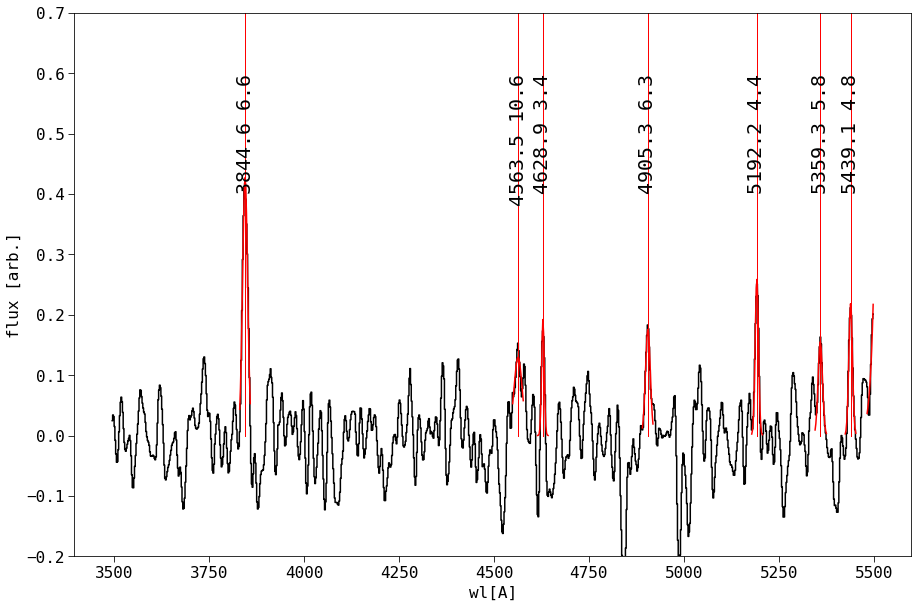

In [52]:
from scipy.optimize import least_squares

f = plt.figure(figsize = [15,10])
plt.plot(ww, csout, drawstyle='steps-mid')
plt.ylim([-.2,.7])
plt.xlabel("wl[A]")
plt.ylabel("flux [arb.]")

results = []
wlwin = 30.
for wlc in lineset:
    p0 = [2000.,wlc,10.]
    ii = (ww > wlc-wlwin/2.) * (ww < wlc+wlwin/2.)
    fit = least_squares(resid, p0, args=(ww[ii], csout[ii]))
    p = fit.x
    #plt.plot(ww[ii], peval(p,ww[ii]))
    results.append([p[0], p[1],p[2]])
    
    plt.plot(ww[ii], peval(p,ww[ii]),'r')
    
    
results = np.array(results)

ii = (results[:,1] > ww[0]) * (results[:,1] < ww[-1])
results = results[ii]
for r in results:
    draw_line(r[1], "{:.1f} {:.1f}".format(r[1],r[2]))



# line identification

In [53]:
from astropy.table import Table, Column

In [54]:
c1 = Column(data=ww,format="%.2f",unit="Angstroms")
c2 = Column(data=csout,format="%.2f",unit="")

st = Table([c1,c2])
st.write("test.fits", format='fits', overwrite=True)

In [55]:
lineset = results[:,1]

In [56]:
!cat linelist.txt

wl[A]   w_gal   w_qso   species
1033.82		0.0	1.0	"O VI"
1215.24		0.0	9.0	"Lyα"
1240.81		0.0	3.0	"N V"
1305.53		0.0	0.0	"O I"
1335.31		0.0	0.0	"C II"
1397.61		0.0	0.0	"Si IV"
1399.8		0.0	1.0	"Si IV + O IV"
1549.48		0.0	8.0	"C IV"
1640.4		0.0	0.0	"He II"
1665.85		0.0	0.0	"O III"
1857.4		0.0	0.0	"Al III"
1908.734	0.0	7.0	"C III"
2326.0		0.0	0.5	"C II"
2439.5		0.0	0.0	"Ne IV"
2799.117	1.0	8.0	"Mg II"
3346.79		0.0	0.0	"Ne V"
3426.85		0.0	0.0	"Ne VI"
3727.092	5.0	1.0	"O II"
3729.875	0.0	0.0	"O II"
3889.0		0.0	0.0	"He I"
4072.3		0.0	0.0	"S II"
4102.89		0.5	2.0	"Hδ"
4341.68		1.0	3.0	"Hγ"
4364.436	0.0	0.0	"O III"
4862.68		2.0	4.0	"Hβ"
4932.603	0.0	0.0	"O III"
4960.295	2.0	2.0	"O III"
5008.240	3.0	2.0	"O III"
6302.046	0.0	0.0	"O I"
6365.536	0.0	0.0	"O I"
6529.03		0.0	0.0	"N I"
6549.86		3.0	0.0	"N II"
6564.61		8.0	8.0	"Hα"
6585.27		3.0	0.0	"N II"
6718.29		3.0	0.0	"S II"
6732.67		3.0	0.0	"S II"


In [223]:
# http://classic.sdss.org/dr6/algorithms/linestable.html
t = ascii.read("linelist.txt")

In [224]:
for i,(l,dl) in enumerate(zip(lineset,dlineset)):
    z = l/t["wl[A]"]-1.
    c = Column(z, name="z_{}".format(i))
    t.add_column(c)
    dz = (l+dl)/t["wl[A]"] - (l-dl)/t["wl[A]"] 
    c = Column(dz, name="dz_{}".format(i))
    t.add_column(c)

In [225]:
for r in t:
    if r["z_0"] < 0.:
        continue
    print("If line {:.2f}A is [{:12s}] at rest. wl = {:.1f}A (z = {:.3f})".format(lineset[0], r["species"], r["wl[A]"], r["z_0"]))   
    for i in range(1, len(lineset)):
        ii = np.abs( r["z_0"] - t["z_{}".format(i)] ) < (r["dz_0"] + t["dz_{}".format(i)])
        
        #print("{} lines match ".format(sum(ii)))
        for _r in t[ii]:
            
            obswl = (_r["wl[A]"] * (1. + r["z_0"]) )
            dA = lineset[i] - obswl
            dv = dA/lineset[i] * 3e5
            print(" Line {:.2f} could be [{:12s}] at rest wl. {}, obs. wl = {:.2f}A, dA = {:.2f}A, dv = {:.2f}kms".format(lineset[i], _r["species"], _r["wl[A]"],obswl, dA, dv))
        

If line 3844.56A is [O VI        ] at rest. wl = 1033.8A (z = 2.719)
 Line 5192.19 could be [Si IV       ] at rest wl. 1397.61, obs. wl = 5197.42A, dA = -5.24A, dv = -302.51kms
If line 3844.56A is [Lyα         ] at rest. wl = 1215.2A (z = 2.164)
 Line 4905.28 could be [C IV        ] at rest wl. 1549.48, obs. wl = 4901.97A, dA = 3.31A, dv = 202.25kms
 Line 5192.19 could be [He II       ] at rest wl. 1640.4, obs. wl = 5189.61A, dA = 2.58A, dv = 148.94kms
If line 3844.56A is [N V         ] at rest. wl = 1240.8A (z = 2.098)
If line 3844.56A is [O I         ] at rest. wl = 1305.5A (z = 1.945)
 Line 4563.48 could be [C IV        ] at rest wl. 1549.48, obs. wl = 4562.95A, dA = 0.53A, dv = 34.72kms
 Line 4905.28 could be [O III       ] at rest wl. 1665.85, obs. wl = 4905.64A, dA = -0.36A, dv = -22.27kms
If line 3844.56A is [C II        ] at rest. wl = 1335.3A (z = 1.879)
If line 3844.56A is [Si IV       ] at rest. wl = 1397.6A (z = 1.751)
If line 3844.56A is [Si IV + O IV] at rest. wl = 1399.8

In [117]:
# labelling 3D map?
a = np.zeros([5,5,5], dtype=bool)
np.unique( skimage.morphology.label(a) )

array([0])

In [43]:
from scipy import interpolate
from scipy import fft, ifft

# Dynamical Mass estimate

In [33]:

s_e = 19.86/3842.52 * 3e5

scale = 8.441 #kpc/arcsec from ned wrights comso cal at z = 2.16

R_e = np.sqrt( 5.**2. + 3.5*2. ) * scale

G = 4.3e-9 # Mpc M_sun^-1 (km/s)^-2

M = s_e**2.*(R_e/1000.)/G

print("estimate M_dyn = {:.2e} M_sun".format(M))

estimate M_dyn = 2.67e+13
